# Pilot studies 1 + 2

## Format the data appropriately for arsenic

In [8]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [9]:
def compute_binding_ddgs(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5

In [10]:
titles = ["K417N", "E484K", "L452R", "N439K", "N501A", "N501V", "N501I", "N501L", "N501M", "N501F", "N501Y", "N501W", "N501S", "N501T", "N501Q", "N501C", "N501G", "N501R", "N501H", "N501K", "N501D", "N501E"]
dir_num = 15
subdirs = [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144]
# to_plot = ['# Calculated block', '# Mutant1, Mutant2, calc_DDG, calc_dDDG(BAR), calc_dDDG(additional)']
to_plot = []
for i, subdir in enumerate(subdirs):
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/ddgs.pickle", "rb") as f:
        ddgs = pickle.load(f)
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/dgs_phase.pickle", "rb") as f:
        dgs_phase = pickle.load(f)
        
        # Compute binding ddgs from BAR
        binding_ddgs_forward = []
        binding_ddgs_backward = []
        for j in range(len(dgs_phase)):
            binding_ddgs_forward.append(compute_binding_ddgs(dgs_phase[subdir][j]['apo'][1], dgs_phase[subdir][j]['complex'][1]))
#             binding_ddgs_backward.append(compute_binding_ddgs(dgs_phase[subdir+1][j]['apo'][1], dgs_phase[subdir+1][j]['complex'][1]))

    to_plot.append([titles[i][:-1], titles[i][-1] + titles[i][1:-1], np.mean(ddgs[subdir])*KT_KCALMOL, np.mean(binding_ddgs_forward)*KT_KCALMOL, abs(np.mean(ddgs[subdir])*KT_KCALMOL - np.percentile(ddgs[subdir], 2.5)*KT_KCALMOL)])
#     to_plot.append([title_pairs[i][1][:-1], title_pairs[i][1][-1] + title_pairs[i][1][1:3], np.mean(ddgs[subdir+1])*KT_KCALMOL, np.mean(binding_ddgs_backward)*KT_KCALMOL, abs(np.mean(ddgs[subdir+1])*KT_KCALMOL - np.percentile(ddgs[subdir+1], 2.5)*KT_KCALMOL)]) # take the negative of these so they match the forward transform values
        
        
        

In [11]:
to_plot

[['K417', 'N417', 4.478342026599137, 0.5109802676609467, 0.8321480613563108],
 ['E484', 'K484', 0.01562568708387605, 0.20137866456126985, 0.49476665209296],
 ['L452', 'R452', 0.4357034698238759, 0.4533784978283935, 0.8199842576140162],
 ['N439',
  'K439',
  -1.0200495856941676,
  0.34422816389965766,
  1.0240603720104837],
 ['N501', 'A501', 0.4732261282048999, 0.22292262907510418, 0.4531393859442618],
 ['N501', 'V501', -0.952995289684172, 0.26164914507969905, 0.5784007489496448],
 ['N501', 'I501', -1.4213799546905992, 0.4465837576918796, 0.5809887823543385],
 ['N501', 'L501', 0.8889993211623805, 0.35211598341211514, 0.9886014142770133],
 ['N501', 'M501', 1.3190709904931621, 0.3988539234791399, 0.7738168639988166],
 ['N501', 'F501', 0.26929649601602423, 0.5393930707668273, 1.2293422510485539],
 ['N501', 'Y501', 0.24418076289603108, 0.6829954966090637, 1.3906308736010424],
 ['N501', 'W501', 1.1906912483929741, 0.41088199099322964, 1.5849286783933594],
 ['N501', 'S501', 3.7181523472953257

In [12]:
d = {'WT': 0, 'N417': 0.62, 'K484': -0.08, 'R452': -0.03, 'K439': -0.06,
    "A501": 0.08, "V501": -0.21, "I501": 0.11, "L501": 1.59, "M501": 0.0, "F501": -0.40, "Y501": -0.33,
    "W501": -0.15, "S501": 0.18, "T501": -0.14, "Q501": 0.08, "C501": 0.80, "G501": 1.30, "R501": 2.87, "H501": 0.0,
    "K501": 3.85, "D501": 3.43, "E501": 1.09}

In [19]:
# experiment = ['# Experiment block', '# Mutant, expt_DDG, expt_dDDG']
experiment = []
for k in d.keys():
    if k == 'WT':
        experiment.append(['K417', d['WT'], 0]) # take the negative of everything bc i think hannah subtracts differently
        experiment.append(['E484', d['WT'], 0])
        experiment.append(['L452', d['WT'], 0])
        experiment.append(['N439', d['WT'], 0])
        experiment.append(['N501', d['WT'], 0])
        
    else:
        experiment.append([k, d[k], 0])

In [20]:
experiment

[['K417', 0, 0],
 ['E484', 0, 0],
 ['L452', 0, 0],
 ['N439', 0, 0],
 ['N501', 0, 0],
 ['N417', 0.62, 0],
 ['K484', -0.08, 0],
 ['R452', -0.03, 0],
 ['K439', -0.06, 0],
 ['A501', 0.08, 0],
 ['V501', -0.21, 0],
 ['I501', 0.11, 0],
 ['L501', 1.59, 0],
 ['M501', 0.0, 0],
 ['F501', -0.4, 0],
 ['Y501', -0.33, 0],
 ['W501', -0.15, 0],
 ['S501', 0.18, 0],
 ['T501', -0.14, 0],
 ['Q501', 0.08, 0],
 ['C501', 0.8, 0],
 ['G501', 1.3, 0],
 ['R501', 2.87, 0],
 ['H501', 0.0, 0],
 ['K501', 3.85, 0],
 ['D501', 3.43, 0],
 ['E501', 1.09, 0]]

In [21]:
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/arsenic_input_pilot_1_2.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


## Make arsenic plot

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from arsenic import plotting, stats, wrangle

In [2]:
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/neq/15/arsenic_input_pilot_1_2.csv')

Graph is not connected enough to compute absolute values


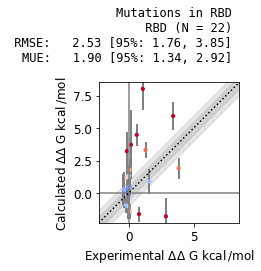

In [3]:
plotting.plot_DDGs(fe.graph,target_name='RBD', title='Mutations in RBD', units=r'$\mathrm{kcal\,/mol}$', filename='/data/chodera/zhangi/perses_benchmark/neq/15/arsenic_pilot_1_2.png')
# added dpi to savefig() in local version
# removed "/" in labels in local version
# removed adding mbar error + other error and just use other error for error bars (in wrangle.py line 18)